In [1]:
import pandas as pd
import seaborn as sns

In [2]:
movies = pd.read_csv('./imdb_top_1000.csv', thousands=',')

In [3]:
movies['Runtime'] = [i.split()[0] for i in movies['Runtime']]
movies['Runtime'] = movies['Runtime'].astype(int)
movies = movies[movies.Released_Year.str.isnumeric()]
movies['Released_Year'] = movies['Released_Year'].astype(int)

In [4]:
# Splitst de genre's op in nieuwe rijen
# Gebruik enkel voor tellen van genre's
moviesExplodeGenre = movies.assign(Genre = movies.Genre.str.split(", ")).explode('Genre')

In [5]:
# Splitst de genre's op in nieuwe kolommen
# Gebruik wanneer exploden rommelt met gegevens
movies[['Genre1', 'Genre2', 'Genre3']] = movies['Genre'].str.split(', ', 2, expand=True)

In [6]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [7]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

Ik ga controleren of er een correlatie is tussen het eerst en tweede genre van een film om te kijken of bepaalde combinaties van genres veel vaker voorkomen dan anderen. Ik verwacht dat hier een verband zal zijn, maar niet dat deze heel sterk is.

In [34]:
contingency = create_contingency_table(movies, 'Genre1', 'Genre2')
contingency

Genre1,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,Horror,Mystery
Genre2,,,,,,,,,,,,
Action,0,0,17,0,0,0,0,0,0,0,0,0
Adventure,72,0,41,0,0,0,0,0,0,0,0,0
Biography,10,7,3,0,0,0,0,0,0,0,0,0
Comedy,12,20,4,7,0,0,0,0,0,0,0,0
Crime,42,0,1,16,25,0,0,0,0,0,0,0
Drama,25,29,10,65,91,99,0,0,0,0,0,0
Family,0,7,5,0,4,0,10,0,0,0,0,0
Fantasy,0,2,0,0,3,0,12,1,0,0,0,0
Film-Noir,0,0,0,0,0,2,8,0,0,0,0,0


<AxesSubplot:xlabel='Genre2'>

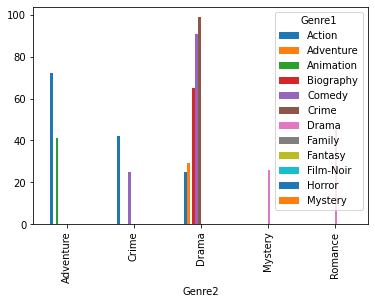

In [35]:
contingency = contingency[contingency > 20].dropna(how='all')
contingency.plot(kind='bar')

Deze grafiek toont alle genre combinaties die vaker dan 20 keer voorkomen en het is duidelijk te zien dat Drama veel met andere genres wordt gecombineerd. Dit is waarschijnlijk omdat Drama een heel brede term is. Als deze term zonder verdere genres gebruikt wordt krijgt een persoon niet veel informatie over de film.

In [33]:
check_cat_vs_cat_correlation(movies, 'Genre1', 'Genre2')

The odds of a correlation between Genre1 and Genre2 is 100.0% (Based on a p value of 7.135421743580139e-267).
This percentage needs to be at least 95% for a significant correlation.


Uit de chi-squared test blijkt dat een 100% kans is op een correlaties tussen twee genres van een film. Dit had ik na het zien van contingency table wel verwacht.